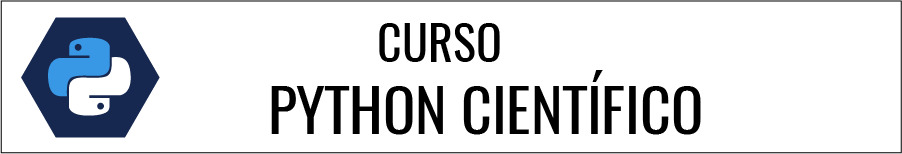

# Transformada Discreta de Fourier

### El desarrollo de este módulo tendrá el siguiente orden  
1. Definición Matemática de la Transformada Discreta de Fourier - Ejemplo en pequeña señal  
2. Identificación Frecucencia Predominante en Señal Discreta  
3. Identificación de Notas Musicales con Audio Real  

In [1]:
# from IPython.display import Image
import numpy as np
import scipy.fftpack as fourier
import matplotlib.pyplot as plt
import scipy.io.wavfile as waves
#import winsound

## Ejemplo en pequeña señal

In [2]:
gn = [0, 1, 2, 3, 4] # Definimos una función en tiempo discreto
gk = fourier.fft(gn) # Calculamos la FFT
gk

array([10. -0.j        , -2.5+3.4409548j , -2.5+0.81229924j,
       -2.5-0.81229924j, -2.5-3.4409548j ])

In [3]:
M_gk = abs(gk)                   # Calculamos la Magnitud de la FFT
Ph_gk = np.angle(gk)             # Calculamos la Fase de la FFT
print('Magnitud: ', M_gk)
print('Angle: ',Ph_gk*180/np.pi)

Magnitud:  [10.          4.25325404  2.62865556  2.62865556  4.25325404]
Angle:  [  -0.  126.  162. -162. -126.]


## Identificación Frecuencia Predominante en Señal Discreta

Crearemos una señal compuesta por dos ondas sinusoidales de 60 Hz y 223 Hz. Agregaremos ruido a la señal compuesta y luego mediante la FFT identificaremos las frecuencias predominantes de la señal sintética

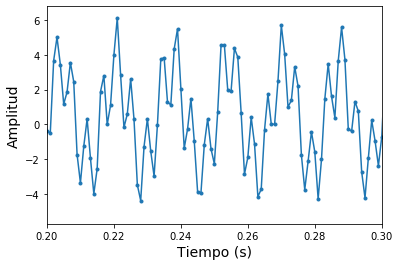

In [12]:
# %matplotlib notebook

Ts = 0.001                                       # Definimos un tiempo y frecuencia de muestreo
Fs = 1.0 / Ts
w1 = 2 * np.pi * 60                                  # Definimos una frecuencia de 60 Hz para la señal 1
w2 = 2 * np.pi * 223                                 # Definimos una frecuencia de 223 Hz para la señal 2

t = Ts * np.arange(0, 1000)
ruido = np.random.random(len(t))
signal = 3 * np.sin(w1 * t) + 2.3 * np.sin(w2 * t) + ruido        # Construimos una señal compuesta por la señal 1 y 2, y agregamos ruido

plt.xlim(0.2, 0.3)
plt.plot(t , signal,'.-')
plt.xlabel('Tiempo (s)', fontsize='14')
plt.ylabel('Amplitud', fontsize='14')
plt.show()

In [16]:
# %matplotlib notebook

gk = fourier.fft(signal)                             # Calculamos la FFT
M_gk = abs( gk )                                  # Calculamos la Magnitud de la FFT
#bool = M_gk > 400
#print(M_gk * bool)
for jj in range(0, 1000):
    if (M_gk[jj] > 100):
        print(jj, t[jj], M_gk[jj])

0 0.0 500.2617991005869
60 0.06 1491.7788046297044
223 0.223 1147.5461536858681
777 0.777 1147.5461536858681
940 0.9400000000000001 1491.7788046297044


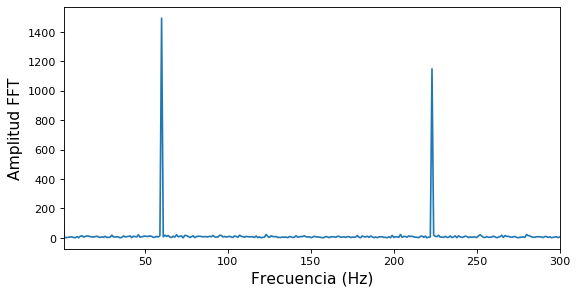

In [23]:
plt.figure(figsize=(8, 4), dpi=80)
F = Fs * np.arange(0, len(signal))/len(signal)              # Definimos el Vector de Frecuencias

plt.plot(F, M_gk)
#plt.ylim(0, 300)
plt.xlim(1, 300)
plt.xlabel('Frecuencia (Hz)', fontsize='14')
plt.ylabel('Amplitud FFT', fontsize='14')
plt.show()

## Identificación de Notas Musicales con Audio Real

* Cargaremos una grabación de audio .wav
* Obtendremos la variación temporal de la señal de audio
* Encontraremos la frecuencia dominante y la compararemos con los rangos de frecuencias de las notas musicales


44100 91008 [  0   0   0 ... 278 267 260]


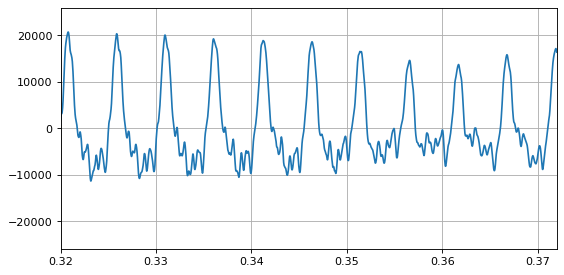

In [29]:
#%matplotlib notebook
plt.figure(figsize=(8, 4), dpi=80)
filename='rec_SOL.wav'                                
#filename='silb.wav'
#filename='aaaa_short.wav'
#winsound.PlaySound(filename, winsound.SND_FILENAME)   # Reproducimos el sonido que vamos a cargar

Fs, data = waves.read(filename)                       # Leemos el archivo de audio del directorio
Audio_m = data[:,0]              

L = len(Audio_m)                                      # Tomamos la longitud de la señal
print(Fs, L , Audio_m)
t = np.arange(0, L)/Fs                                 # Definimos un vector de tiempo de la misma longitud de la señal
plt.xlim(0.320,0.372)
plt.plot(t, Audio_m)
plt.grid()
plt.show()

91008 45504


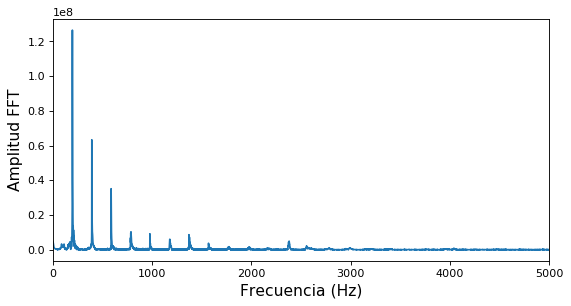

In [30]:
# %matplotlib notebook
plt.figure(figsize=(8, 4), dpi=80)
print(L, L//2)
gk = fourier.fft(Audio_m)                        # Calculamos la FFt de la señal de audio
M_gk = abs(gk)                                   # Tomamos la Magnitud de la FFT
M_gk = M_gk[0:L//2]                              # Tomamos la mitad de los datos (recordar la simetría de la transformada)

Ph_gk = np.angle(gk)
F = Fs / L * np.arange(0, L//2)
plt.xlim(0, 5000)
#plt.ylim(0,6.0e7)
plt.plot(F, M_gk)
plt.xlabel('Frecuencia (Hz)', fontsize='14')
plt.ylabel('Amplitud FFT', fontsize='14')
plt.show()

In [9]:
#for jj in range(0, L//2):
#    if (M_gk[jj] > 1.0e5):
#        print(jj, F[jj], M_gk[jj])

In [31]:
PosM = np.where(M_gk == np.max(M_gk))           # Encontramos la posición para la cual la Magnitud de FFT es máxima
#Posm = np.where(M_gk == np.min(M_gk))           # Encontramos la posición para la cual la Magnitud de FFT es mínima
F_fund = F[PosM]                                # Identificamos la Frecuencia asociada al valor del máximo de la Magnitud de FFT
#F_fund = F[Posm]                                # Identificamos la Frecuencia asociada al valor del máximo de la Magnitud de FFT
print(F_fund)
if F_fund > 135 and F_fund < 155:                   # Rango de frecuencias para nota RE
    print("La nota es RE, con frecuencia: ",F_fund)
elif F_fund > 190 and F_fund < 210:                   # Rango de frecuencias para nota SOL
    print("La nota es SOL, con frecuencia: ",F_fund)
elif F_fund > 235 and F_fund < 255:                     # Rango de frecuencias para nota SI
    print("La nota es SI, con frecuencia: ",F_fund)
elif F_fund > 320 and F_fund < 340:                   # Rango de frecuencias para nota MI
    print("La nota es MI, con frecuencia: ",F_fund)

[195.76740506]
La nota es SOL, con frecuencia:  [195.76740506]
